In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 0.) Clean the Apple Data to get a quarterly series of EPS.

In [2]:
y = pd.read_csv('AAPL_quarterly_financials.csv')

In [3]:
y.index = y.name

In [4]:
y = pd.DataFrame(y.loc['BasicEPS', :]).iloc[2:, :]

In [5]:
y.index = pd.to_datetime(y.index)

In [6]:
# check if nas are no dividend period
y = y.sort_index().fillna(0.)

# 1.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [7]:
from pytrends.request import TrendReq

In [8]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["iPhone", "Android", 'Samsung', 'Tim Cook', 'Mac', "iPad", 'LeBron', 'Super Bowl', 'UCLA']  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [9]:
df = df.resample('Q').mean()

In [10]:
temp = pd.concat([y, df],axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

# 2.) Normalize all the X data

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
X_scaled = scaler.fit_transform(df)

/Users/kw/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/kw/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


# 3.) Import data. Train, Test, Holdout (80%,15%,5%)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [14]:
from sklearn.linear_model import Lasso

In [15]:
lasso = Lasso(alpha = 0.1)

In [16]:
lasso.fit(X_scaled[:-2], y)

/Users/kw/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


Lasso(alpha=0.1)

In [17]:
coefficients = lasso.coef_

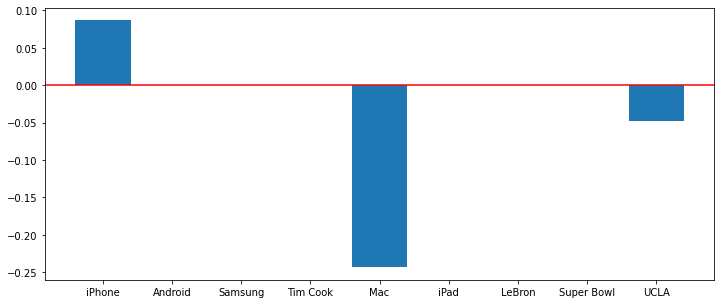

In [18]:
plt.figure(figsize = (12, 5))
plt.bar(X.columns, coefficients)
plt.axhline(0, color = 'red')
plt.show()

# 5.) Do these coefficient magnitudes make sense?

# Answer: I think it partly makes sense as iPhone should be correlated with AAPL and UCLA is not really related, but it is weird that Mac is irrelevent.

# 6.) Run a for loop looking at 10 different Lambdas and plot the coefficient magnitude for each.

# 7.) Run a cross validation. What is your ideal lambda?